In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Funcion que simplifica la recuperación de los DataSet.
Adicionalmente, elimina las columnas que no utilizaremos 
Agregará Categoricos , como Genero, Raza , y Diagnostico de Diabetes.

Juntara, los datasets de demografia con los de laboratorio de glucosa, y 
eliminará los valores nulos.

In [3]:
def getDataset(Year):
    # valid years are e : 2010, f: 2012 , g:2014 , h: 2016 , i 2018
    
    fnDemo = "../DATA/DEMO_" + Year + ".XPT"
    fnGluco= "../DATA/OGTT_" + Year + ".XPT"
    
    df_demo =pd.read_sas(fnDemo)
    
    
    dfd =  df_demo[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH1']]
    
    df_gluco =pd.read_sas(fnGluco)
    
    dfg =  df_gluco[['SEQN','LBXGLT','LBDGLTSI']] 
    # Join both dataframes using the SEQN as key, no nos sirven los registros sin 
    # valores de glucosa
    
    dataframe  = dfd.join(dfg.set_index('SEQN'),on='SEQN').dropna()
    
    # Agreguemos los categoricos 
    
    # create a dictionary that maps each unique score to a grade
    race_dict = {
    1: 'Mex-Am',
    2: 'Ot-His',
    3: 'White',
    4: 'Black',
    5: 'OtRace' }
    dataframe['Race'] =dataframe['RIDRETH1'].map(race_dict)
    gender_dict = {
    1: 'Male',
    2: 'Female'}
    dataframe['Gender'] =dataframe['RIAGENDR'].map(gender_dict)

    # define the bins to segment the data
    bins = [0, 140, 200,800]

    # define the labels for the bins
    labels = ['Normal', 'Deficiencia', 'Diabetes']
    
    dataframe['Diagnostic'] = pd.cut(dataframe['LBXGLT'],bins=bins, labels=labels)
 
    
    return dataframe
        
    

Nhanes  "National Heatlh and Nutrition Examination Survey" 

  Nos permite acceder a sus datasets de laboratorio de los años 2010, 2012,2014, 2016 y 2018. ( Las encuestas fuerón pausadas durante la pandemia).
  

In [4]:
g2010 = getDataset("E")
g2012 = getDataset("F")
g2014 = getDataset("G")
g2016 = getDataset("H")
g2018 = getDataset("I")

Graficamos los Boxplots de cada año

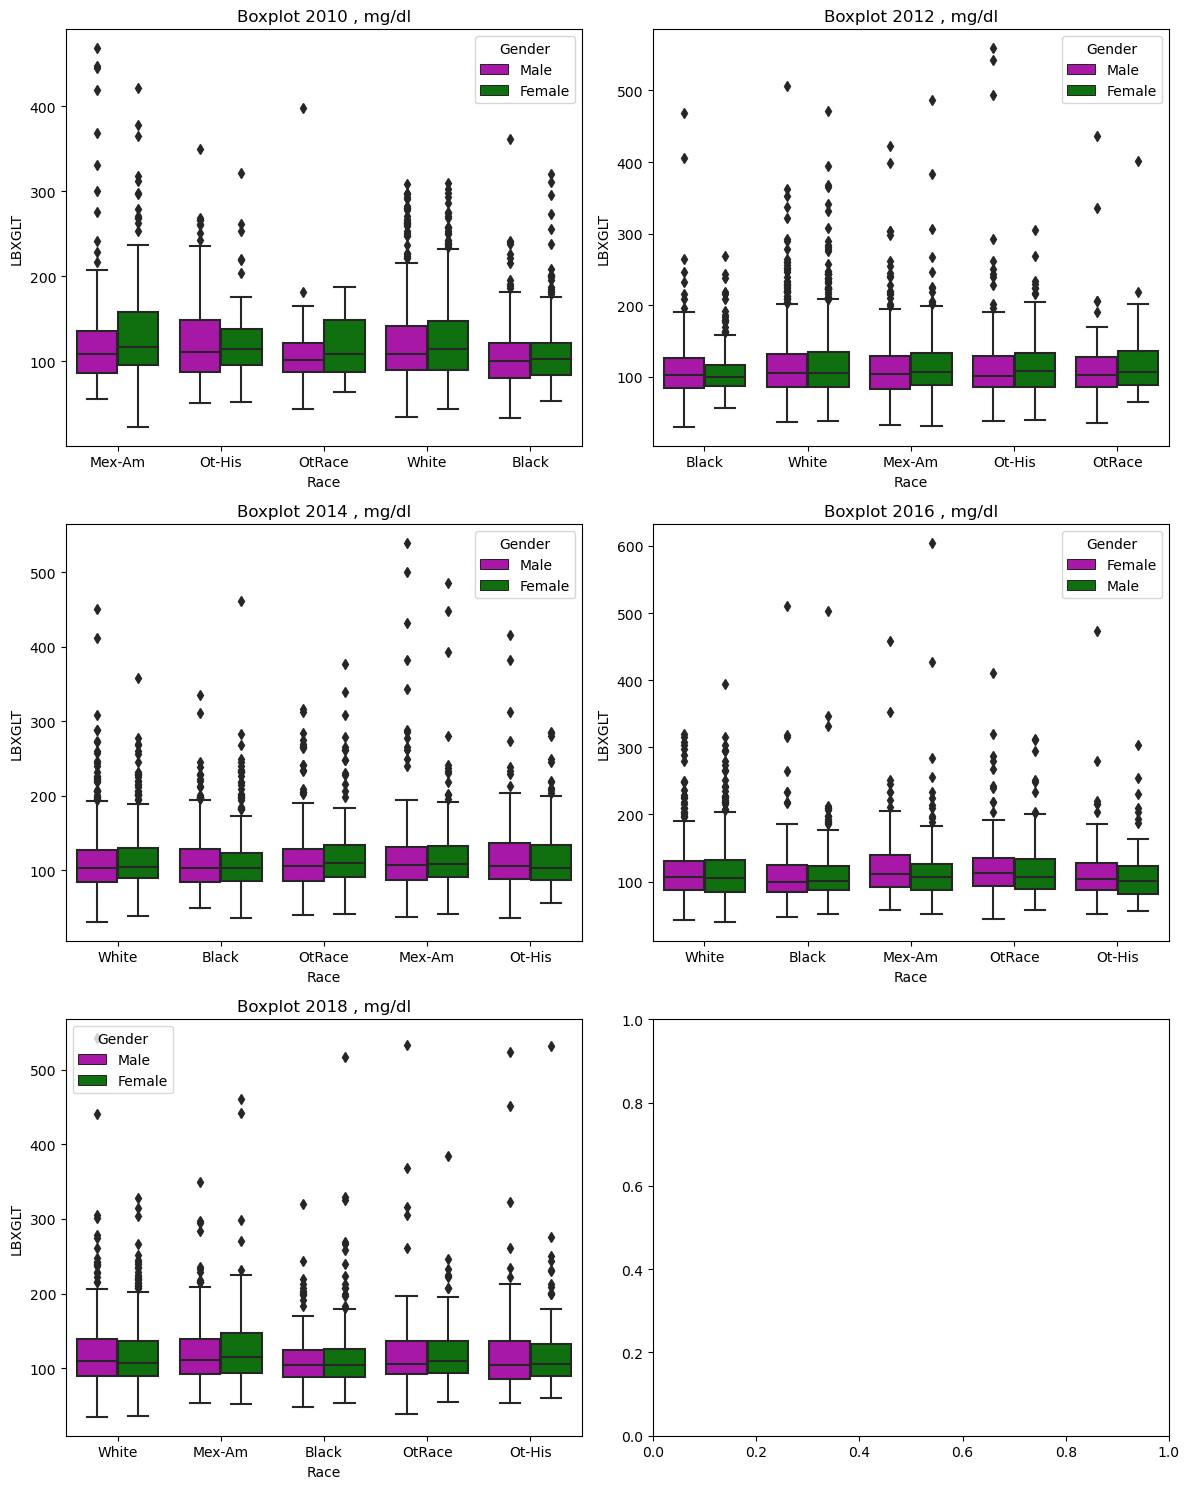

In [5]:
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))


sns.boxplot(x="Race", y="LBXGLT",
            hue="Gender", palette=["m", "g"],
            data=g2010,ax=axs[0,0])
#sns.despine(offset=10, trim=True)
axs[0,0].set_title('Boxplot 2010 , mg/dl')

sns.boxplot(x="Race", y="LBXGLT",
            hue="Gender", palette=["m", "g"],
            data=g2012,ax=axs[0,1])
#sns.despine(offset=10, trim=True)
axs[0,1].set_title('Boxplot 2012 , mg/dl')

sns.boxplot(x="Race", y="LBXGLT",
            hue="Gender", palette=["m", "g"],
            data=g2014,ax=axs[1,0])
#sns.despine(offset=10, trim=True)
axs[1,0].set_title('Boxplot 2014 , mg/dl')

sns.boxplot(x="Race", y="LBXGLT",
            hue="Gender", palette=["m", "g"],
            data=g2016,ax=axs[1,1])
#sns.despine(offset=10, trim=True)
axs[1,1].set_title('Boxplot 2016 , mg/dl')


sns.boxplot(x="Race", y="LBXGLT",
            hue="Gender", palette=["m", "g"],
            data=g2018,ax=axs[2,0])
#sns.despine(offset=10, trim=True)
axs[2,0].set_title('Boxplot 2018 , mg/dl')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [19]:
print("  2010    ")

df=g2010.loc[g2010['RIDRETH1']==1]
print(" Race :  White    ")
print(df['LBXGLT'].describe())


  2010    
  White    
count    415.000000
mean     126.910843
std       62.056576
min       23.000000
25%       89.000000
50%      111.000000
75%      144.000000
max      468.000000
Name: LBXGLT, dtype: float64


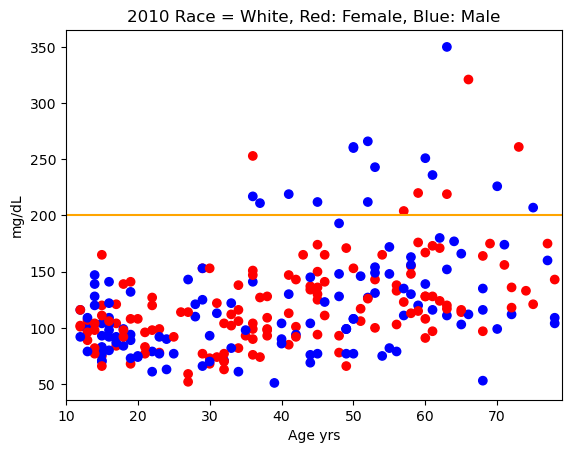

In [24]:
plt.title('2010 Race = White, Red: Female, Blue: Male')

# create a reference line
ref_line_x = [0, 80]
ref_line_y = [200, 200]

plt.xlim(10, 79)
colors ={'Male':'blue', 'Female':'red'}
plt.xlabel('Age yrs')
plt.ylabel('mg/dL')


plt.scatter(df['RIDAGEYR'],df['LBXGLT'],c=df['Gender'].map(colors))
plt.plot(ref_line_x, ref_line_y, color='orange')
plt.show()

In [21]:
print("  2010    ")

df=g2010.loc[g2010['RIDRETH1']==2]
print(" Race :  Mexican    ")
print(df['LBXGLT'].describe())

  2010    
 Race :  Mexican    
count    272.000000
mean     123.058824
std       47.952662
min       51.000000
25%       92.000000
50%      112.000000
75%      143.000000
max      350.000000
Name: LBXGLT, dtype: float64


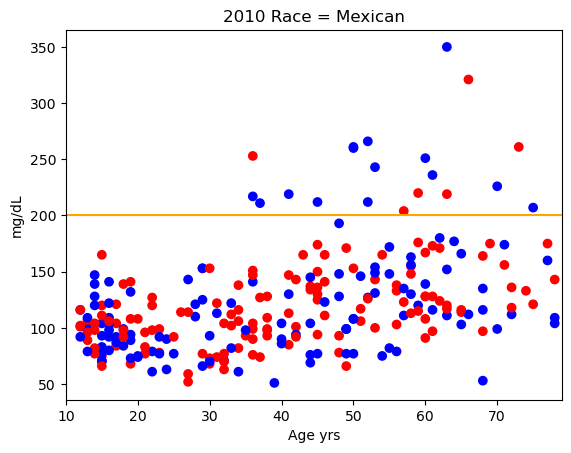

In [22]:
plt.title('2010 Race = Mexican')

# create a reference line
ref_line_x = [0, 80]
ref_line_y = [200, 200]

plt.xlim(10, 79)
colors ={'Male':'blue', 'Female':'red'}
plt.xlabel('Age yrs')
plt.ylabel('mg/dL')


plt.scatter(df['RIDAGEYR'],df['LBXGLT'],c=df['Gender'].map(colors))
plt.plot(ref_line_x, ref_line_y, color='orange')
plt.show()